<a href="https://colab.research.google.com/github/Nishpowale/Startup-Profit-Prediction-using-Regression-/blob/main/Startup_ProfitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###In the given dataset, R&D Spend, Administration Cost and MarketingSpend of 50 Companies are given along with the profit earned.

###The target is to prepare an ML model which can predictthe profit value of a company if the value of its R&D Spend,Administration Cost and MarketingSpend are given. 


 

> i) Construct Different Regression algorithms


> ii) Divide the data into train set and test set


> iii) Calculate different regression metrics

> iv) Choose the best model








In [33]:
import pandas as pd#for handling the data set 
import numpy as np # for mathematical calculations
import seaborn as sns#for Visualization 
import matplotlib.pyplot as plt# For Visualization 
import sklearn # for model evaluation 
%matplotlib inline

#Analysis of the Data 
----

In [34]:
df=pd.read_csv('50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [35]:
df.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [36]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [37]:
df.shape
print('There are ' , df.shape[0], 'rows and' , df.shape[1], 'Columns')

There are  50 rows and 4 Columns


In [38]:
#Check to see if there are null/missing values present in the dataset
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

There are no null values present in the dataset .

In [39]:
df.info()
#The info() method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [40]:
df_correlation=df.corr() 
df_correlation 
#used to find the pairwise correlation of all columns in the dataframe

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#Exploratory Data Analysis 
----

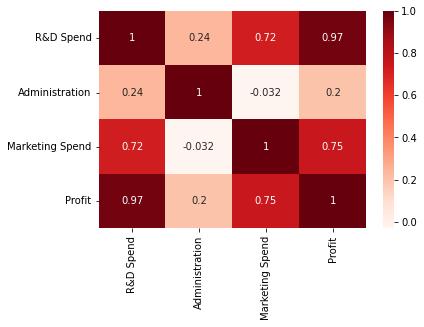

In [41]:
sns.heatmap(df_correlation,annot=True,cmap='Reds')
plt.show()

As we can see from the heat map the profit is storngly correlated to the R&D spend and Marketing spend.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


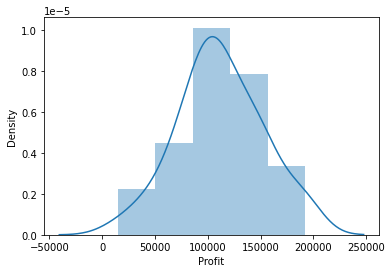

In [42]:
sns.distplot(df['Profit'],bins= 5,kde= True)
plt.show()

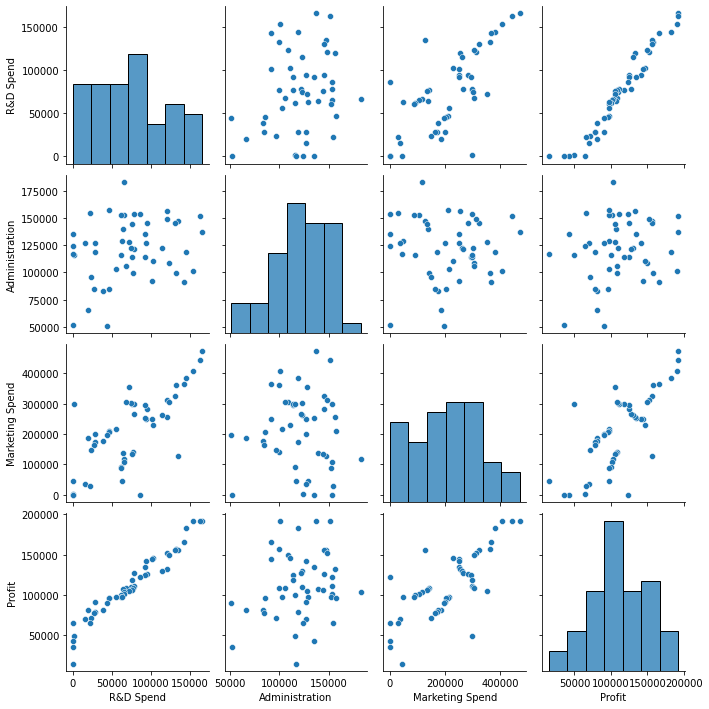

In [43]:
sns.pairplot(df)
plt.show()

From the pair plot we can conclude that :

-->Research and development are directly proprtional to the profit the startups make . So investment in R&D is good for the Startup.

--> Marketing spend is directly correlated as well with profit but there seem to be a few outliers as well. 

--> Adminsistration is not correlated to the profit generated as we can see from the pair plot 

The pair plot provides a better visual understanding of the inter realtionship  between the features and the target variable .

##Model Development 
---

In [54]:
# spliting Dataset in Dependent & Independent Variables
x = df.iloc[:, :-1].values # R& D spend, Administration and Marketing Columns
y = df.iloc[:, 3].values # Profit Coulmn
x


array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [58]:
y


array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [69]:
#Splittig the data set into testing and training data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, train_size=  0.7, random_state= 0 ) # 70 % of the data set is used to train the model
#and the values are taken randomly using random state 
print(x_test)


[[ 66051.52 182645.56 118148.2 ]
 [100671.96  91790.61 249744.55]
 [101913.08 110594.11 229160.95]
 [ 27892.92  84710.77 164470.71]
 [153441.51 101145.55 407934.54]
 [ 72107.6  127864.55 353183.81]
 [ 20229.59  65947.93 185265.1 ]
 [ 61136.38 152701.92  88218.23]
 [ 73994.56 122782.75 303319.26]
 [142107.34  91391.77 366168.42]
 [ 55493.95 103057.49 214634.81]
 [ 46014.02  85047.44 205517.64]
 [ 75328.87 144135.98 134050.07]
 [ 46426.07 157693.92 210797.67]
 [ 91749.16 114175.79 294919.57]]


In [60]:
#Implementing the model 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train,y_train)
print('The Model has been trained using 70% of the data set ')

The Model has been trained using 70% of the data set 


In [61]:
y_hat= model.predict(x_test)
y_hat
#Using all the three columns the model predicts the profit 

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

In [71]:
#testing the score of the model 
testing_data_model_score=model.score(x_test,y_test)
print('Model Score of the Test Data is as follows:',testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score on Training data  is as follows:",training_data_model_score)

Model Score of the Test Data is as follows: 0.9355188337118219
Model Score on Training data  is as follows: 0.9515391457049143


In [73]:
df_comparison=pd.DataFrame(data={'Predicted Values':y_hat.flatten(),'Actual Values': y_test.flatten()})
df_comparison 

,Predicted Values,Actual Values
0,104054.442939,103282.38
1,132719.345970,144259.40
2,133640.268309,146121.95
3,72294.769115,77798.83
4,179685.622278,191050.39
5,114508.975720,105008.31
6,66305.230699,81229.06
7,98297.693266,97483.56
8,114277.918949,110352.25
9,169112.360957,166187.94


The Predicted values by the model are close to the actual values of the dataset although there is  certain variation. 


##Error Calculation 
---

In [74]:
from sklearn.metrics import r2_score
R2score=r2_score(y_hat,y_test)
print('R2 Score of the developed Model is :',R2score*100)

R2 Score of the developed Model is : 93.41560653448714


In [75]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_hat,y_test)
print("Mean Absolute Error is :" ,mae)


Mean Absolute Error is : 6489.6601704866425


The Mean absolute error indicates that the predicted value can be  6489.6601704866425  more or less than the actual value of the test data .